In [131]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pickle
import sklearn.metrics as metrics
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
from numpy import where
from sklearn.metrics import f1_score

In [106]:
infile = open('XGBoost_model_smote.sav','rb')
model = pickle.load(infile)
infile.close()

In [107]:
flights = pd.read_csv('data/flights.csv')
flights = flights[['fl_date','mkt_carrier','origin','dest'
                  ,'taxi_out','taxi_in','cancelled','crs_elapsed_time','arr_delay']]

#features and target
X = flights.loc[:,flights.columns!='cancelled']
y = flights[['cancelled']]

In [108]:
X['fl_date'] = pd.to_datetime(X['fl_date'],format='%Y-%m-%d')
X['year'] = pd.DatetimeIndex(X['fl_date']).year
X['month'] = pd.DatetimeIndex(X['fl_date']).month
X['day'] = pd.DatetimeIndex(X['fl_date']).day

In [109]:
X = X[['month','day','origin','dest','crs_elapsed_time']]

In [110]:
X= pd.get_dummies(X,columns=['origin','dest'])

In [111]:
#calculating the weights of class 0 to 1
class_0 = y.loc[y['cancelled'] == 0].value_counts().values[0]
class_1 = y.loc[y['cancelled'] == 1].value_counts().values[0]
weight = class_0/class_1
print('Ratio of Class 0 to Class 1:',weight)

Ratio of Class 0 to Class 1: 60.72839506172839


In [112]:
oversample = SMOTE(random_state=0)
X_resampled, y_resampled = oversample.fit_sample(X, y)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,shuffle=True,stratify=y_resampled, test_size=0.30, random_state=123)

In [126]:
X_train

,month,day,crs_elapsed_time,origin_ABE,origin_ABI,origin_ABQ,origin_ABR,origin_ABY,origin_ACK,origin_ACT,...,dest_VEL,dest_VLD,dest_VPS,dest_WRG,dest_WYS,dest_XNA,dest_XWA,dest_YAK,dest_YKM,dest_YUM
68792,7,2,71,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114215,6,26,70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313523,8,19,180,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
518377,7,5,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
483231,6,12,184,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507742,2,4,112,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398198,4,8,80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227562,12,4,76,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269089,5,11,113,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
X_test

,month,day,crs_elapsed_time,origin_ABE,origin_ABI,origin_ABQ,origin_ABR,origin_ABY,origin_ACK,origin_ACT,...,dest_VEL,dest_VLD,dest_VPS,dest_WRG,dest_WYS,dest_XNA,dest_XWA,dest_YAK,dest_YKM,dest_YUM
3433,6,29,96,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
549660,2,11,140,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179392,7,19,96,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264769,1,11,63,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
402157,2,11,76,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58068,6,30,148,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
391091,9,2,119,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131873,4,25,97,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144014,5,4,114,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
y_pred = model.predict(X_test.values)

In [129]:
roc_auc_score(y_test,y_pred)

0.9561733414650674

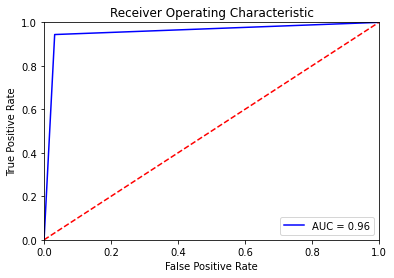

In [130]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [132]:
f1_score(y_test,y_pred)

0.9556334284195303